In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
from IPython.display import set_matplotlib_formats
import seaborn as sns
sns.set_style('whitegrid')


set_matplotlib_formats('retina')  # 한글코드를 더 선명하게 해주는 조치, 레티나 설정
matplotlib.rc('font', family='AppleGothic') # 폰트 설정
matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

In [4]:
df = pd.read_csv("/Users/taewoongkong/workspace/TOY/dust_df.csv")


In [18]:
for num in range(1, 8):
    print(df.loc[df[f'{num}일'].isna()].index.tolist())

[76, 158]
[76, 158]
[76]
[76, 172]
[76]
[76, 213, 215]
[76, 213, 215]


In [31]:
df = df.loc[~df.index.isin([76, 158, 172, 213, 215])]

In [32]:
need_df = df[['1일', '2일', '3일', '지역명', '경도', '위도']]

In [33]:
def urban(district):
    if district in ['서울', '인천', '대전']:
        return 1
    else:
        return 0

In [34]:
need_df['target'] = need_df['지역명'].apply(urban)

/Users/taewoongkong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
need_df

,1일,2일,3일,지역명,경도,위도,target
0,43.0,43.0,25.0,서울,127.047060,37.517968,1
1,47.0,51.0,27.0,서울,127.136799,37.545021,1
2,58.0,51.0,29.0,서울,127.011870,37.647934,1
3,54.0,56.0,30.0,서울,126.835179,37.544670,1
4,51.0,45.0,30.0,서울,126.927114,37.487396,1
...,...,...,...,...,...,...,...
230,51.0,52.0,27.0,충북,127.926118,36.964365,0
231,43.0,39.0,24.0,세종,127.370358,36.527078,0
232,52.0,56.0,45.0,세종,127.291977,36.592468,0
233,49.0,45.0,29.0,세종,127.246890,36.512351,0


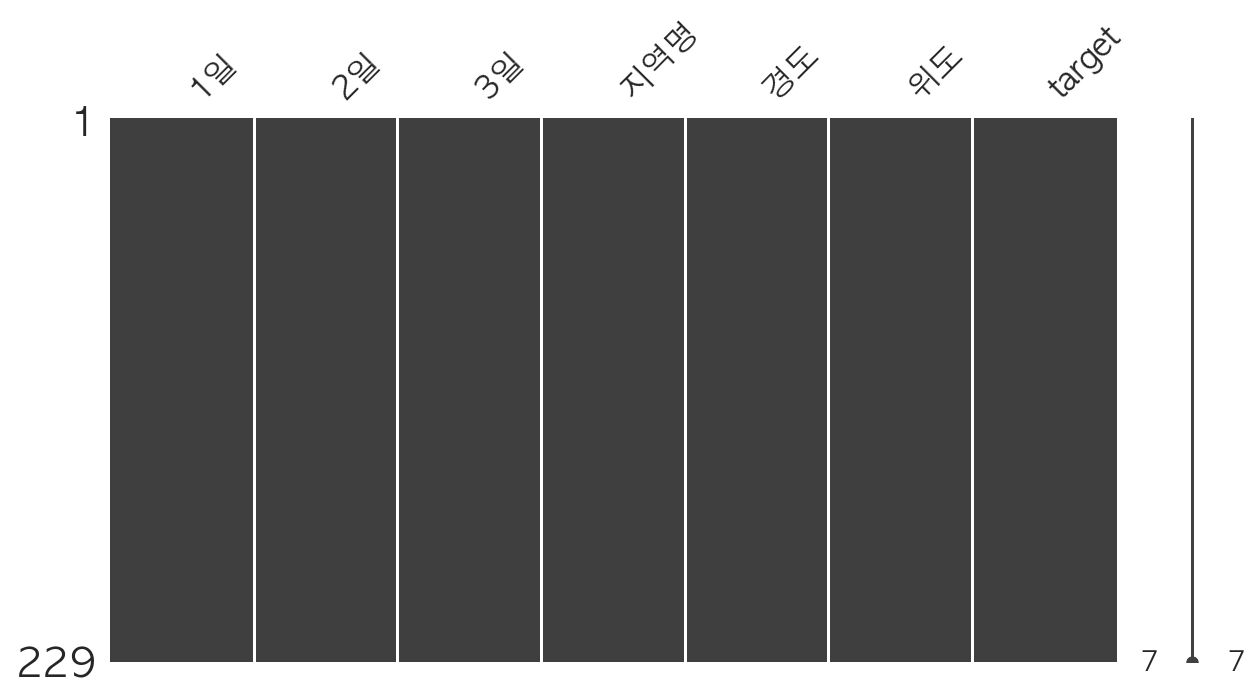

In [36]:
import missingno as msno

msno.matrix(need_df, figsize=(10,5))

In [37]:
X_df = need_df[['1일', '2일', '3일']]
y_df = need_df['target']

In [44]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=3, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_df)

need_df['dbscan_cluster'] = dbscan_labels

dust_result = need_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(dust_result)


target  dbscan_cluster
0        0                160
        -1                 11
         1                  3
1        0                 55
Name: dbscan_cluster, dtype: int64


/Users/taewoongkong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
need_df

,1일,2일,3일,지역명,경도,위도,target,dbscan_cluster
0,43.0,43.0,25.0,서울,127.047060,37.517968,1,0
1,47.0,51.0,27.0,서울,127.136799,37.545021,1,0
2,58.0,51.0,29.0,서울,127.011870,37.647934,1,0
3,54.0,56.0,30.0,서울,126.835179,37.544670,1,0
4,51.0,45.0,30.0,서울,126.927114,37.487396,1,0
...,...,...,...,...,...,...,...,...
230,51.0,52.0,27.0,충북,127.926118,36.964365,0,0
231,43.0,39.0,24.0,세종,127.370358,36.527078,0,0
232,52.0,56.0,45.0,세종,127.291977,36.592468,0,1
233,49.0,45.0,29.0,세종,127.246890,36.512351,0,0


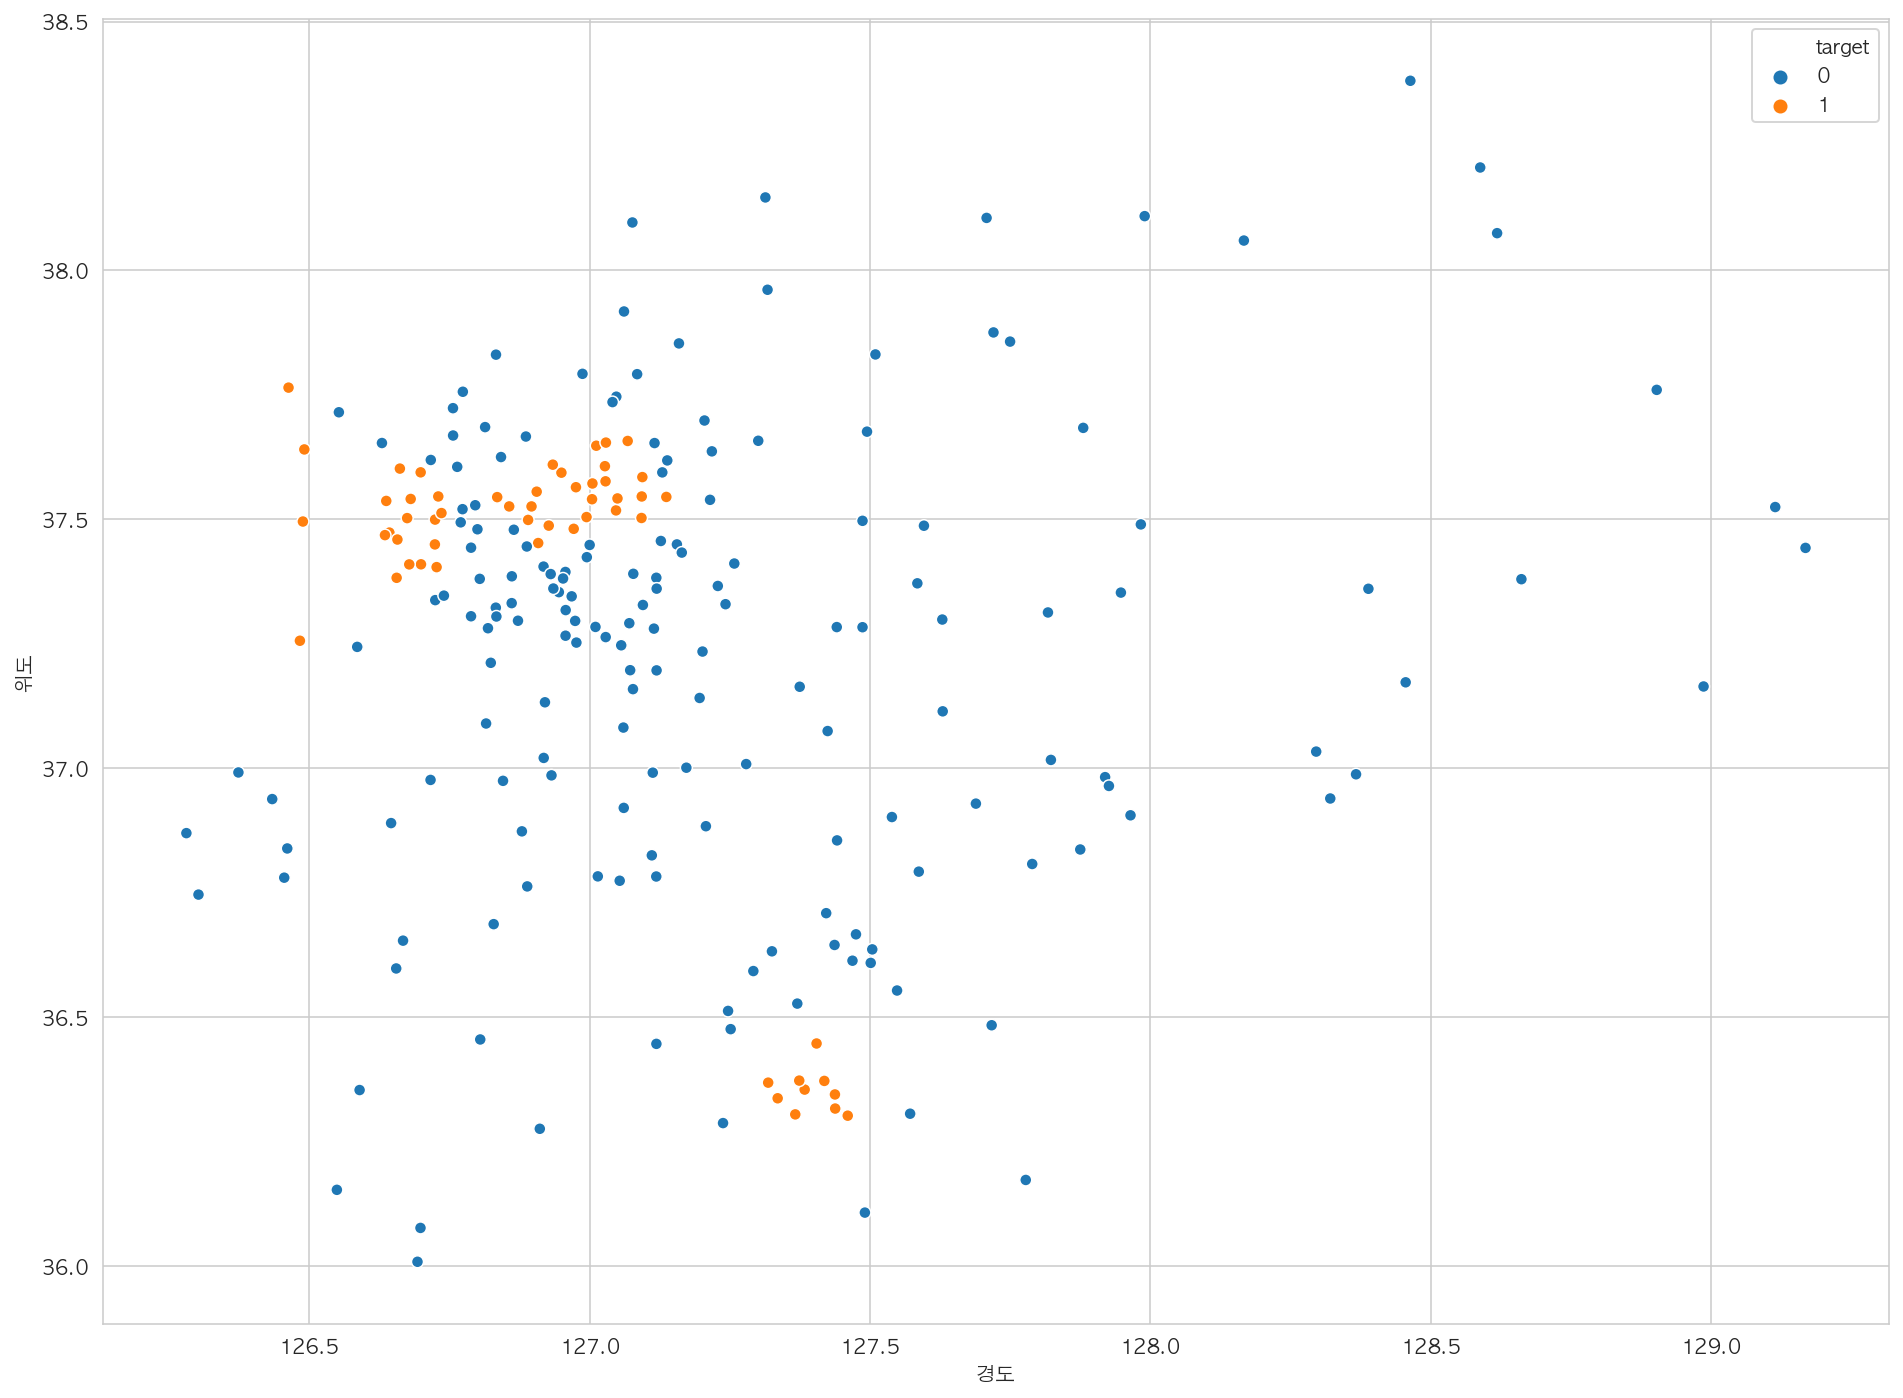

In [40]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=need_df, x='경도', y='위도', hue='target')

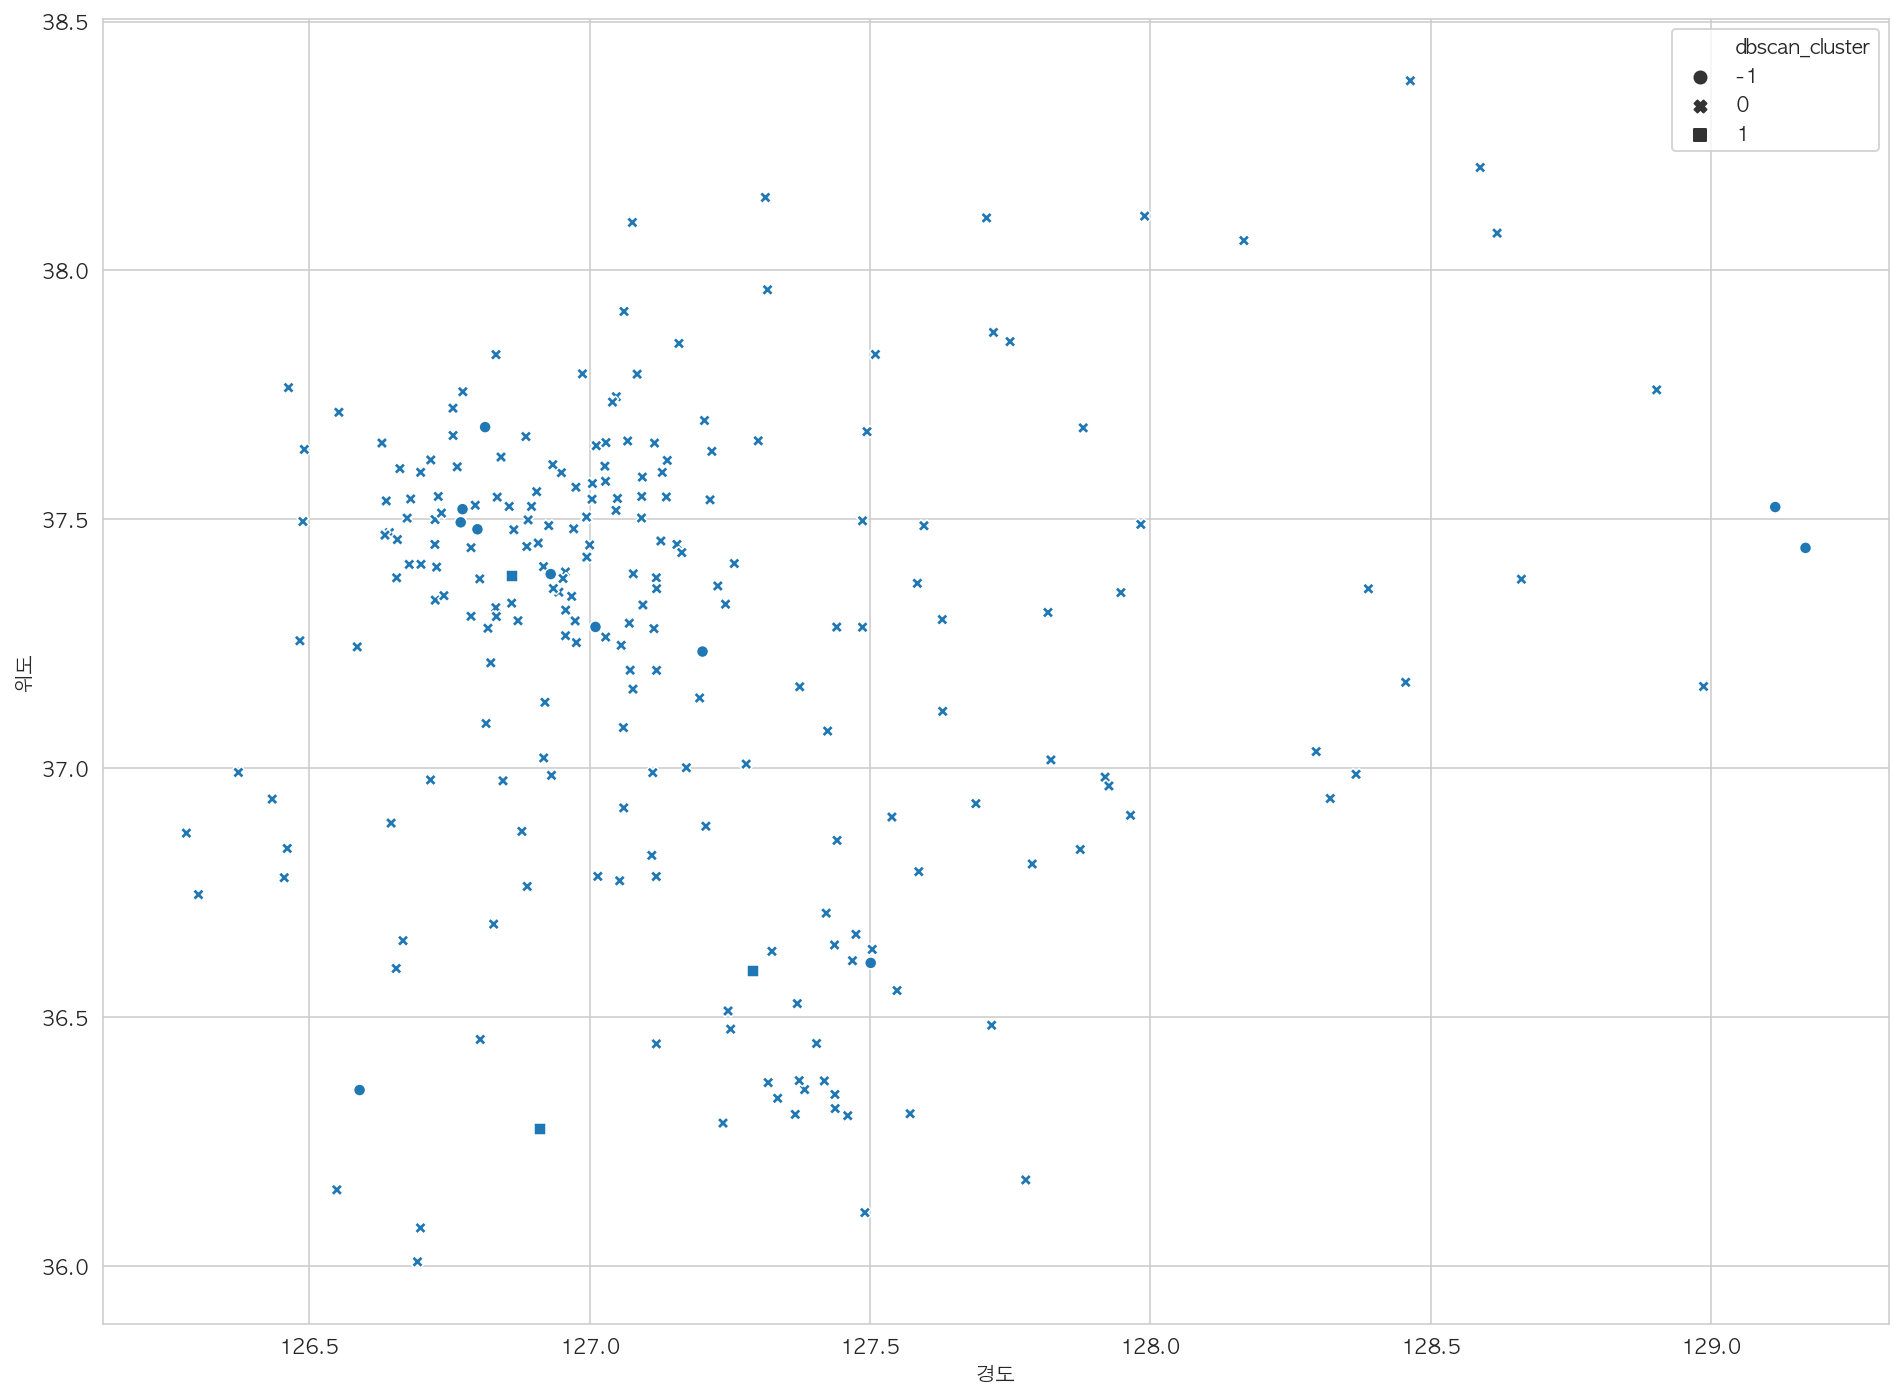

In [42]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=need_df, x='경도', y='위도', style='dbscan_cluster')